## Color and color maps 2: Correlation heat maps

Load the iris data and define the draw colormap function from the previous notebook.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,:4]
col_labels = iris.feature_names
# Shorten the attribute names
col_labels = [c[:-5] for c in col_labels]
df = pd.DataFrame(X, columns=col_labels)


def draw_colormap (cmap_name,width=60,height=4,fontsize=50,fig = None, ax=None,
                  ticklabels_bd = (0,1), num_ticks =11):
    """
    cmap_name is a string.
    """
    if fig is None:
        fig = plt.figure(figsize=(width,height)) 
    if ax is None:
        ax = plt.gca()
    #mpl.rcParams['xtick.labelsize'] = fontsize
    #mpl.rcParams['font.size'] = fontsize
    # Divide the interval from 0 to 1 into 256 parts.
    gradient = np.linspace(0, 1, 256)
    # The imshow function actually displays images,
    # but you can pass it an array.
    # In either case, the function wants 2D info.  
    # We give it an array with 2 rows,
    # make the top half and bottom half  of the image the same. 
    # We'll vertically stretch this very skinny image with aspect 'auto'.
    # And the value of gradient will change the color value from left to right.
    gradient = np.vstack((gradient, gradient))
    ax.imshow(gradient, aspect='auto',cmap=plt.get_cmap(cmap_name))
    # Show the number values associated with color on x-axis.
    # The xvalues that imshow uses are pixel numbers, integers from 0 to 256.
    ax.set_xticks(np.linspace(0,256,num_ticks))
    # We'll label those with the inputs to the color map, numbers from 0 to 1
    ax.set_xticklabels(np.linspace(ticklabels_bd[0],ticklabels_bd[1],num_ticks))
    ax.set_yticklabels([])
 
# Put in an color map name you like here.
cmap_name = 'coolwarm'

The cell above loads the by now familiar iris data set.

We do something new with it.  We calculate the **correlations** among all the attributes, including
the correlation of each attribute with itself.

In [3]:
#calculate correlations between real-valued attributes

corMat = df.corr()
corMat

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


First let's talk about the meanings of the correlation numbers, which are illustrated with the scatterplots below.

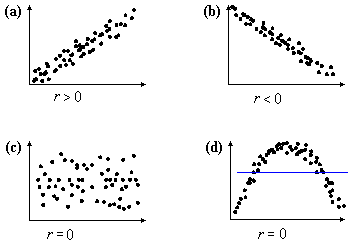

In [4]:
from IPython.display import Image
Image(filename='corcoef2.png') 

Note case (d).  There is a clear mathematical relationship between the attributes, but it's not linear.  Because of that the numbers of the y attribute go up when x goes up half the time, but then they go down when x goes up
for the other half.  Because we're averaging the correlation pointwise over the entire diagram, these two halves 
cancel each other out, and we get a final correlation score of `0`, definitely a misleading result.

Now take a moment to look at the iris correlation table to make sure you understand it.

Correlation scores go from -1 to 1.  Perfect correlation is 1.  Perfect negative correlation
is -1.

Look at petal length and petal width.  They have a correlation of .962757.  That's very high.
That means that whenever petal length goes up, petal width almost always goes up by a corresponding
amount.  Whenever petal length goes down, petal width almost always goes down by a corresponding amount.
The two length attributes also have a fairly high correlation, .871754, and sepal length
and petal width also have a fairly high correlation. .817954.

However, although length and width are correlated for petals, they are **anticorrelated**
for sepals.  They have a negative correlation of -.109369.

Notice the entries along the diagonal are all 1.  The correlation of any attribute with
itself is perfect, so it's 1.  Notice also that
the table is symmetric.  Each correlation not on the diagonal appears twice.
So the entry in row 3, column 1 is the same as the entry in row 1, column 3.
Verify that that's true, and that it makes sense.

What does correlation mean?  Well it means what we said.  If you compare the petal lengths
of iris A and iris B, and B has a higher petal length than A, than
there is a very good chance that the petal width of B is also bigger than the petal width
of A --- **by a corresponding amount**.  We will omit the formula and the definition
of correlation here, but intuitively it means that  the distance from the mean in STD units 
of B's width is very close to the distance from the mean in STD units 
of A's width.

Negative correlation of two attributes means that if A's value for the first is larger
than B's value, then A's value for the second will tend to be smaller.

Next we try to turn this all into colors.  We're going to use another **divergent** color map
because we want to clearly distinguish the negative correlations from the positive
correlations.  This one is called **coolwarm**.  Blue (cool) will means negative
correlation; red (warm) positive correlation.  The stronger the correlation (positive
or negative, the stronger (more saturated) the color.

Now here's the **same information** using color.  This kind of plot is called
a **correlation heat map**.  Generally we use *hot* colors to represent strong
correlation, *cool* colors for negative correlation.  

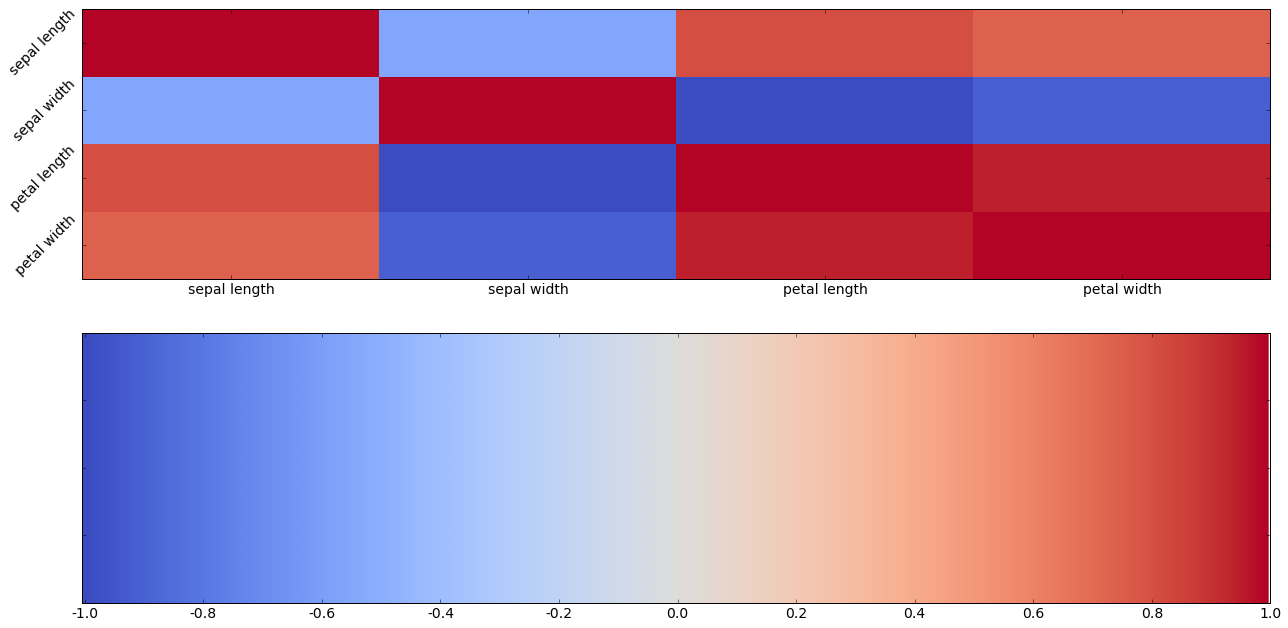

In [37]:
# Make the data frame into an array. Reverse direction of rows to make diagonal point right way.
corMat2 = corMat.values[::-1]
#corMat2 = corMat.values
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['font.size'] = 14
#pd.set_option('display.width',200)

fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(20,10))
# Add intuitive labels to axes
ax0,ax1 = axes[0],axes[1]
ax0.set_xticks(np.linspace(.5,3.5,4))
ax0.set_xticklabels(col_labels)

ax0.set_yticks(np.linspace(.5,3.5,4))
ax0.set_yticklabels(col_labels[::-1],rotation=45)
#ax0.set_yticklabels(col_labels,rotation=45)

#visualize correlations using heatmap
ax0.pcolor(corMat2,cmap=cmap_name)

#fig.colorbar(ax0,ticks=np.linspace(0,1,11))
draw_colormap(cmap_name,fig=fig,ax=ax1,ticklabels_bd=(-1,1))

Using colors is nice but not that helpful here, because there are so few attributes.  Let's try
using color with a larger array of attributes.  In data mining mode, we might just be scanning a
large square of color patches for patches patches of dark red.

In [10]:
list(col_labels.values).index('Height')

2

In [5]:
target_url = ("http://archive.ics.uci.edu/ml/machine-"
              "learning-databases/abalone/abalone.data")
abalone = apd.read_csv(target_url,header=None, prefix="V")
abalone.columns = ['Sex', 'Length', 'Diameter', 'Height',
                   'Whole weight', 'Shucked weight',
                   'Viscera weight', 'Shell weight', 'Rings']
col_labels = abalone.columns[1:]

#calculate correlation matrix excluding non numerical atribute 'Sex'
corMat = abalone.iloc[:,1:9].corr()
corMat2 = corMat.values[::-1]
#print correlation matrix
print(corMat)


summary = abalone.describe()
minRings = summary.iloc[3,7]
maxRings = summary.iloc[7,7]
nrows = len(abalone.index)
meanRings = summary.iloc[1,7]
sdRings = summary.iloc[2,7]

NameError: name 'apd' is not defined

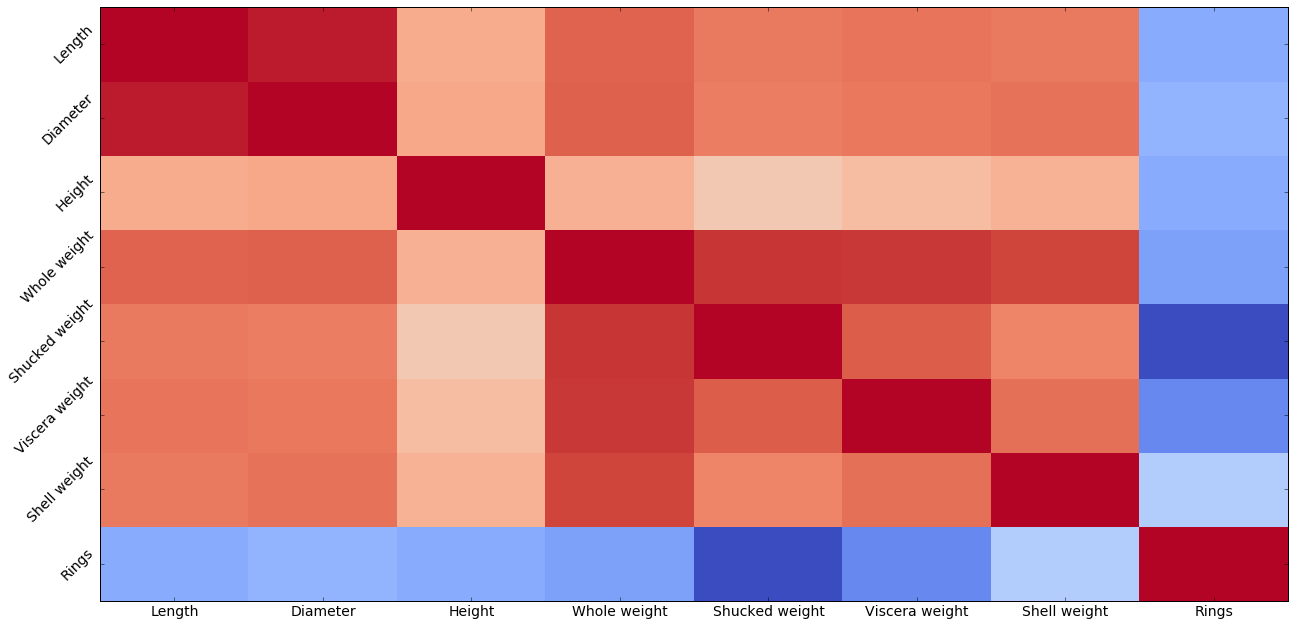

In [26]:
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(20,10))
ax0 = axes
ax0.set_xticks(np.linspace(.5,7.5,8))
ax0.set_xticklabels(col_labels)

ax0.set_yticks(np.linspace(.5,7.5,8))
ax0.set_yticklabels(col_labels[::-1],rotation=45)
#ax0.set_yticklabels(col_labels,rotation=45)

#visualize correlations using heatmap
plt.pcolor(corMat2,cmap=cmap_name)
#plot.show()

Looking down the last column is interesting, because it shows none of the attributes has a positive
correlation with age.  

## Homework

1.  Looking at the abalone correlation heat map, what has the strogest correlation with `Length` other than `Length`?
2.  What attribute has the strongest negative correlation with age.  Does that mean it's useless at 
    predicting age?  Explain why or why not.
3.  What attribute has the strongest positive correlation with shell weight? Besides shell weight.
4.  What pair of attributes comes the closest to "no relation" (= zero correlation)?
5.  What is the numerical value of the correlation of shell weight with whole weight?
6.  What is the numerical value of the correlation of shell weight with viscera weight?
7.  Write some code that redraws the correlation heat map with the Rings column and row removed.

In [4]:
def corr_from_corr_mat (cormat, attributes, att1, att2):
    """
    cormat is a pandas DataFrame.
    attributes is a pandas Index object
    """
    ind1= list(attributes.values).index(att1)
    ind2 = list(attributes.values).index(att2)
    return cormat.values[ind1,ind2]
    

In [17]:
type(corMat.values)

numpy.ndarray

In [20]:
corr_from_corr_mat(corMat,col_labels,'Whole weight', 'Shucked weight')

0.96940545670343337